# import library

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
cmap = plt.get_cmap('Spectral') #mengimpor warna gradasi


# data kejahatan di london 2008 - 2016

## persiapan

In [2]:
df_crime_london=pd.read_csv('london_crime_by_lsoa.csv') #import data
df_crime_london.shape #mengetahui banyaknya baris dan kolom yang diperoleh

(13490604, 7)

In [3]:
df_crime_london.describe(include='O').transpose() #mengetahui banyaknya data yang unik dan frekuensinya

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Common Assault,522180


In [4]:
df_crime_london.describe(exclude='O').transpose() #mengetahui deskripsi data secara singkat

,count,mean,std,min,25%,50%,75%,max
value,13490604.0,0.477944,1.771513,0.0,0.00,0.0,1.00,309.0
year,13490604.0,2012.000000,2.581989,2008.0,2010.00,2012.0,2014.00,2016.0
month,13490604.0,6.500000,3.452053,1.0,3.75,6.5,9.25,12.0


In [5]:
df_crime_london.isnull().any() #mengetahui apakah ada data yang kosong dan ternyata tidak ada data yang kosong

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [6]:
df_crime_london.info() #mengetahui value dari masing-masing kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [11]:
#berdasarkan dari data yang kosong dan value dari kolom maka data yang ada sudah benar dan dapat langsung digunakan
df_crime_london.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


# total kejahatan per tahun pada 2008 -2016

## periapan

In [14]:
#mengekstrak data yang diperlukan yaitu data kejahatan 'value' tiap tahunnya
tahun = df_crime_london['year'].unique()
total_pertahun = df_crime_london.groupby('year').sum()
total=total_pertahun['value'].to_numpy()

n = len(tahun)
for i in range(n):
    for j in range (0, n-i-1):
        if tahun[j]>tahun[j+1]:
            tahun[j], tahun[j+1] = tahun[j+1], tahun[j]
            total[j], total[j+1] = total[j+1], total[j]

print(tahun)
print(total)

[2008 2009 2010 2011 2012 2013 2014 2015 2016]
[715324 736121 737329 711624 724915 686407 680183 717214 738641]


## infografis

In [20]:
df_pertahun = pd.DataFrame({'Tahun':tahun, 'Total':total})
df_pertahun.set_index('Tahun', inplace=True)

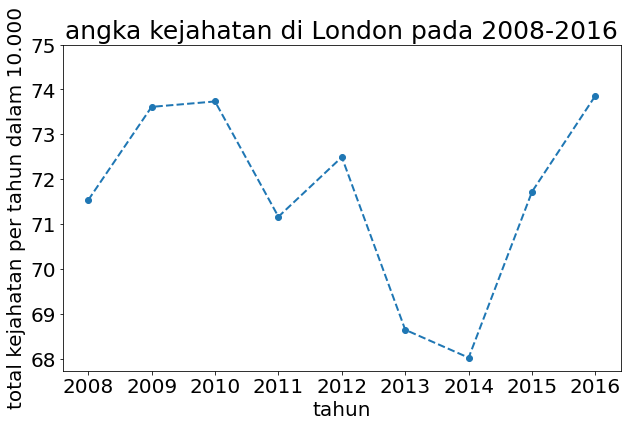

In [24]:
df_pertahun.plot(marker='o', ls='--', lw=2, legend=None, figsize=(10,6))
plt.xlabel('tahun', size=20)
plt.ylabel('total kejahatan per tahun dalam 10.000', size=20)
plt.title('angka kejahatan di London pada 2008-2016', size=25)
plt.xticks(size=20)
values=np.arange(68, 76 , 1)
values_incerment=10000
plt.yticks(values*values_incerment,['%d' %val for val in values], size=20)
plt.show()


### Kesimpulan
- Dari gambar dapat diketahui terjadi peningkatan kejahatan yang sangat drastis pada tahun 2014 hingga 2016. Hal ini menimbulkan beberapa pertanyaan sebagai berikut:
   -  kategori kejahatan apa yang menominasi kategori kejahatan?
    - Daerah mana yang mengalami kejatan paling besar pada tahun tersebut?
 

# kategori kejahatan berat pada tahun 2014 - 2016

## preparasi

In [30]:
df_crime_london.set_index('year', inplace=True)

In [39]:
df_14=df_crime_london.loc[[2014]]
df_15=df_crime_london.loc[[2015]]
df_16=df_crime_london.loc[[2016]]

In [40]:
# kategori berat 2014
kategori= df_14['major_category'].unique()
total_kategori14 = df_14.groupby('major_category').sum()
total_kat_14=total_kategori14['value'].to_numpy()

n = len(kategori)
for i in range(n):
    for j in range (0, n-i-1):
        if kategori[j]>kategori[j+1]:
            kategori[j], kategori[j+1] = kategori[j+1], kategori[j]
            total_kat_14[j], total_kat_14[j+1] =total_kat_14[j+1], total_kat_14[j]

print(kategori)
print(total_kat_14)

['Burglary' 'Criminal Damage' 'Drugs' 'Fraud or Forgery'
 'Other Notifiable Offences' 'Robbery' 'Sexual Offences'
 'Theft and Handling' 'Violence Against the Person']
[     0  13037      0 185349  22150  76053 279880  59279  44435]


In [41]:
# kategori berat 2015
kategori= df_15['major_category'].unique()
total_kategori15 = df_15.groupby('major_category').sum()
total_kat_15=total_kategori15['value'].to_numpy()

n = len(kategori)
for i in range(n):
    for j in range (0, n-i-1):
        if kategori[j]>kategori[j+1]:
            kategori[j], kategori[j+1] = kategori[j+1], kategori[j]
            total_kat_15[j], total_kat_15[j+1] =total_kat_15[j+1], total_kat_15[j]

print(kategori)
print(total_kat_15)

['Burglary' 'Criminal Damage' 'Drugs' 'Fraud or Forgery'
 'Other Notifiable Offences' 'Robbery' 'Sexual Offences'
 'Theft and Handling' 'Violence Against the Person']
[284022  62976  39785      0  14229  21383 218740      0  70489]


In [42]:
# kategori berat 2016
kategori= df_16['major_category'].unique()
total_kategori16 = df_16.groupby('major_category').sum()
total_kat_16=total_kategori16['value'].to_numpy()

n = len(kategori)
for i in range(n):
    for j in range (0, n-i-1):
        if kategori[j]>kategori[j+1]:
            kategori[j], kategori[j+1] = kategori[j+1], kategori[j]
            total_kat_16[j], total_kat_16[j+1] =total_kat_16[j+1], total_kat_16[j]

print(kategori)
print(total_kat_16)

['Burglary' 'Criminal Damage' 'Drugs' 'Fraud or Forgery'
 'Other Notifiable Offences' 'Robbery' 'Sexual Offences'
 'Theft and Handling' 'Violence Against the Person']
[ 68285      0 294133 232381      0  15809  22528  38914  64071]


In [46]:
df_kat_berat=pd.DataFrame({'Kategori': kategori, '2014': total_kat_14, '2015': total_kat_15, '2016': total_kat_16})
df_kat_berat['Total'] = df_kat_berat.sum(axis=1)
df_kat_berat.set_index('Kategori',inplace=True)
df_kat_berat

/tmp/ipykernel_15935/2405804479.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_kat_berat['Total'] = df_kat_berat.sum(axis=1)


,2014,2015,2016,Total
Kategori,,,,
Burglary,0,284022,68285,352307
Criminal Damage,13037,62976,0,76013
Drugs,0,39785,294133,333918
Fraud or Forgery,185349,0,232381,417730
Other Notifiable Offences,22150,14229,0,36379
Robbery,76053,21383,15809,113245
Sexual Offences,279880,218740,22528,521148
Theft and Handling,59279,0,38914,98193
Violence Against the Person,44435,70489,64071,178995


## infografis

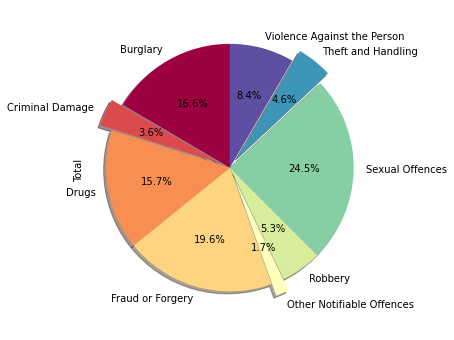

In [49]:
color1= [cmap(i) for i in np.linspace(0, 1, 9)]
explode_list=[0, 0.1, 0, 0, 0.1, 0, 0, 0.1, 0] 
df_kat_berat['Total'].plot(kind='pie',
                                         figsize=(5,6),
                                         autopct='%1.1f%%',
                                         startangle=90, 
                                         shadow=True,
                                         colors=color1,
                                         explode=explode_list)
plt.title=('kategori kejahatan di London pada 2014 - 2016')
plt.axis('equal')
plt.show()

### kesimpulan
- ketegori kejahatan di dominasi oleh sexual offences, fraud or forgery, burglary, drugs

# angka kejahatan pada setiap daerah